In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

### Let's start by loading the Excel spreadsheets into pandas DataFrames. 

In [3]:
data_path = './data'
#act = pd.read_excel(f'{data_path}/ACT.xlsx')
#act_disag = pd.read_excel(f'{data_path}/ACT_DESAGREGADO.xlsx')
#adherence = pd.read_excel(f'{data_path}/Adherencia.xlsx')
familiar_records = pd.read_excel(f'{data_path}/Antecedentes_familiares.xlsx')
#pathological_records = pd.read_excel(f'{data_path}/Antecedentes_patologicos.xlsx')
#diagnostics_aids = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx')
#biologics_asthma = pd.read_excel(f'{data_path}/Biologicos Asma.xlsx')
life_quality = pd.read_excel(f'{data_path}/Calidad de vida relacioada en salud.xlsx')
basic_info = pd.read_excel(f'{data_path}/Datos basicos.xlsx')
#dyspnea = pd.read_excel(f'{data_path}/Disnea.xlsx')
#ram_pharmacovigilance = pd.read_excel(f'{data_path}/Farmacovigilancia RAM.xlsx')
#habits = pd.read_excel(f'{data_path}/Habitos.xlsx')
#hospitalizations = pd.read_excel(f'{data_path}/Hospitalizaciones.xlsx')
#collecting_issues = pd.read_excel(f'{data_path}/Incosistencias en reclamacion.xlsx')
#medicines = pd.read_excel(f'{data_path}/Medicamentos.xlsx')
#height_weight = pd.read_excel(f'{data_path}/Mediciones de peso y talla.xlsx')
#emergencies = pd.read_excel(f'{data_path}/Urgencias.xlsx')
#vaccines = pd.read_excel(f'{data_path}/Vacunacion.xlsx')

### Datos basicos

In [4]:
basic_info.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


In [5]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
ID                     888 non-null int64
edad                   887 non-null float64
genero                 886 non-null object
escolaridad            877 non-null object
EstadoCivil            878 non-null object
Preferencia            202 non-null object
Departamento           886 non-null object
Ciudad                 886 non-null object
Estrato                887 non-null float64
Zona                   887 non-null object
AcompaÃ±ante           861 non-null object
NivelSocioEconomico    871 non-null object
Ocupacion              861 non-null object
Regimen                861 non-null object
TipoAfiliacion         861 non-null object
RelacionLaboral        861 non-null object
FE_NACIMIENTO          887 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 118.0+ KB


In [6]:
basic_info.describe(include='all')

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
count,8.880000e+02,887.000000,886,877,878,202,886,886,887.000000,887,861,871,861,861,861,861,887
unique,NaN,NaN,2,8,6,3,12,52,NaN,2,10,6,8,4,3,5,861
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2004-05-12 00:00:00
freq,NaN,NaN,617,390,420,192,703,470,NaN,853,531,637,463,837,536,477,3
mean,1.259328e+06,40.839910,NaN,NaN,NaN,NaN,NaN,NaN,2.985344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.326579e+05,18.356553,NaN,NaN,NaN,NaN,NaN,NaN,0.867529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.900988e+05,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.254720e+06,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.645597e+06,55.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


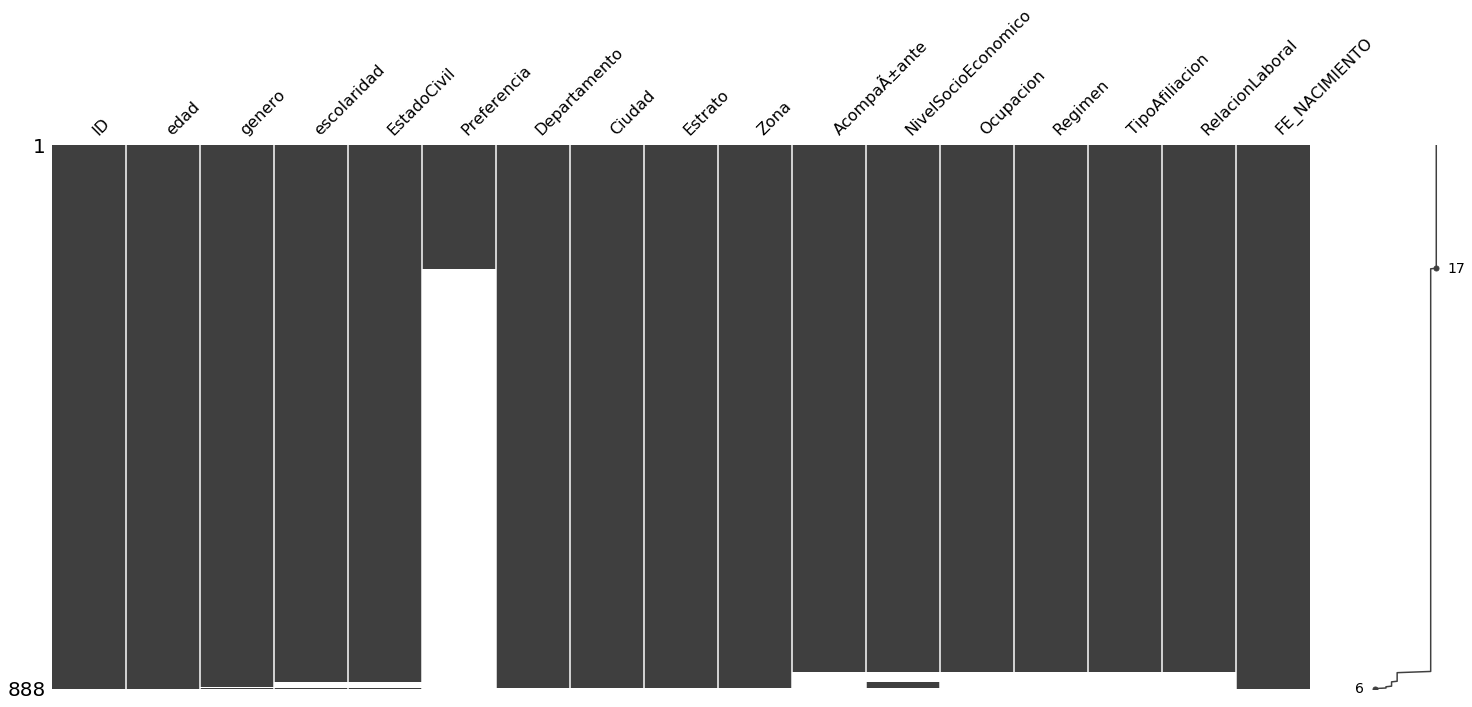

In [7]:
msno.matrix(msno.nullity_sort(basic_info, sort='descending'))

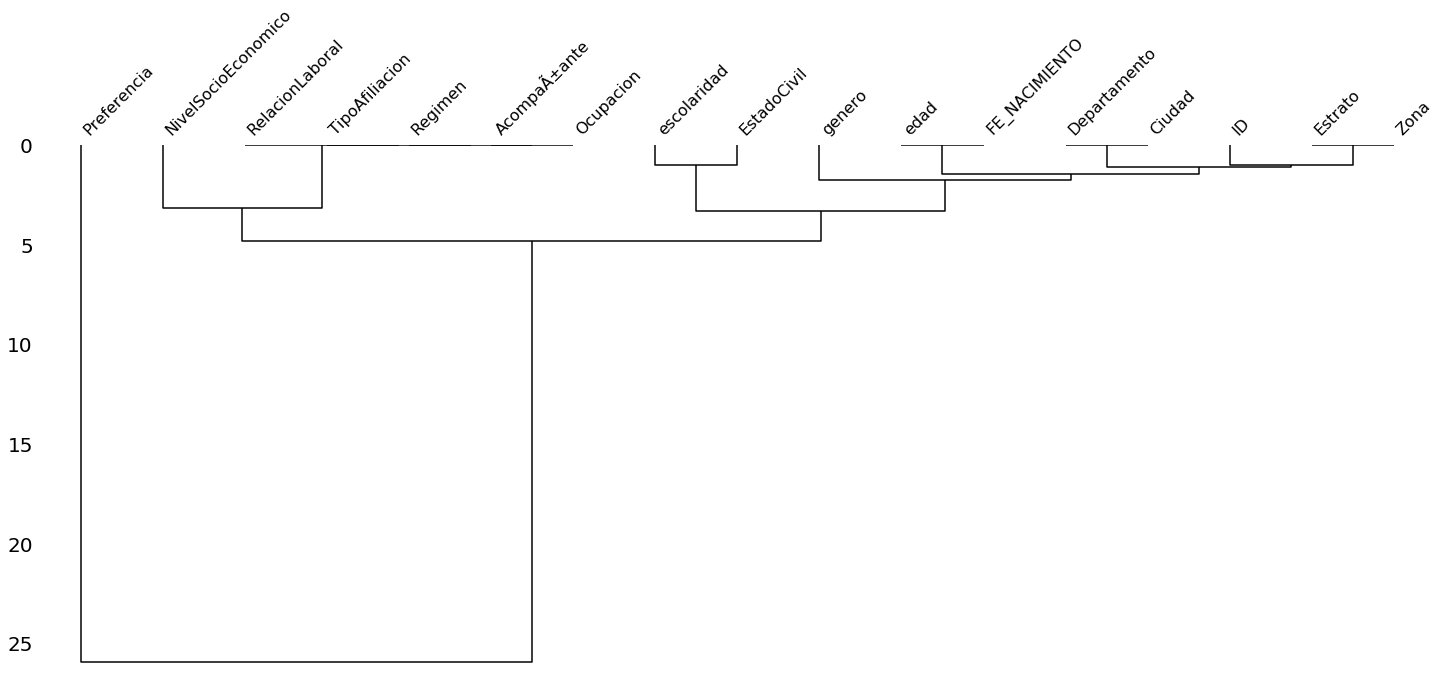

In [8]:
msno.dendrogram(basic_info)

In [9]:
basic_info.groupby('genero').count()

,ID,edad,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
genero,,,,,,,,,,,,,,,,
F,617,616,610,611,146,615,615,616,616,600,606,600,600,600,600,616
M,269,269,267,267,56,269,269,269,269,261,263,261,261,261,261,269


In [10]:
basic_info.groupby('Zona').count()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
Zona,,,,,,,,,,,,,,,,
RURAL,34,34,34,34,34,8,34,34,34,33,33,33,33,33,33,34
URBANA,853,852,851,842,843,194,852,852,853,828,838,828,828,828,828,852


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


[Text(0.5,0,'Age')]

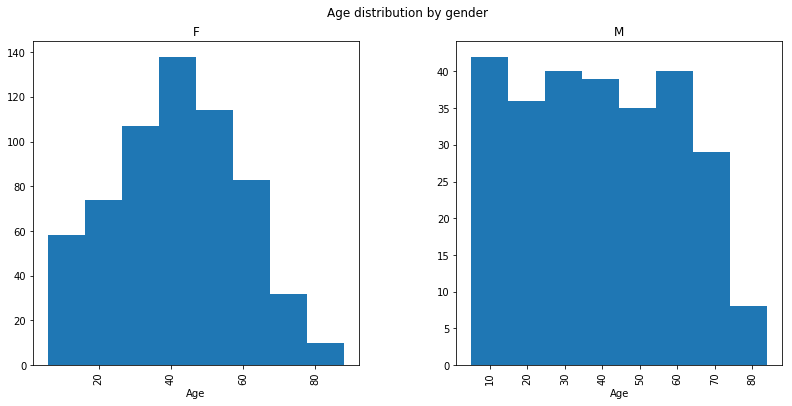

In [11]:
fig, ax = plt.subplots(figsize=(13,6))
chart_axes = basic_info[['edad','genero']].hist(by='genero', bins=8, ax=ax)
fig.suptitle("Age distribution by gender")
chart_axes[0].set(xlabel="Age")
chart_axes[1].set(xlabel="Age")

Text(0.5,0,'Social stratum classification')

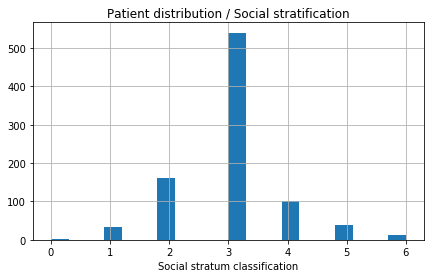

In [12]:
plt.figure(figsize=(7,4))
basic_info['Estrato'].hist(bins=20)
plt.title("Patient distribution / Social stratification")
plt.xlabel("Social stratum classification")

In [13]:
count_per_mpio = basic_info[['ID', 'Ciudad']].groupby('Ciudad').count().reset_index()
count_per_mpio.head()

,Ciudad,ID
0,ANDES,1
1,ANTIOQUIA,5
2,ARMENIA,4
3,BARBOSA,1
4,BARRANQUILLA,48


In [14]:
count_per_depto = basic_info[['ID', 'Departamento']].groupby('Departamento').count().reset_index()
count_per_depto.loc[count_per_depto['Departamento'] == 'VALLE', 'Departamento'] = "VALLE DEL CAUCA" # VALLE -> VALLE DEL CAUCA
count_per_depto

,Departamento,ID
0,ANTIOQUIA,703
1,ARMENIA QUINDIO,1
2,ATLANTICO,53
3,BOLIVAR,2
4,CALDAS,28
5,CUNDINAMARCA,40
6,MAGDALENA,1
7,MEDELLIN,6
8,PEREIRA,3
9,QUINDIO,4


In [15]:
mpios_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/mpio.json'
deptos_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/depto.json'
coords = [7.1986, -75.3412]

In [16]:
deptos_gdf = gpd.read_file(deptos_colombia_url)
deptos_gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,POLYGON ((-76.30393314122961 8.616514809855945...
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,POLYGON ((-74.86716728669083 10.35842774071002...
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,POLYGON ((-74.01948861243253 4.792254432176655...
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15607875564588 10.420831662843, ..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.2095112233977 7.024662781962941,..."


In [17]:
merge_count_deptos = deptos_gdf.merge(count_per_depto, how='left', left_on='NOMBRE_DPT', right_on='Departamento').fillna(0)

In [18]:
m = folium.Map(
    location=coords,
    tiles='CartoDB positron',
    zoom_start=7  # Limited levels of zoom for free Mapbox tiles.
)

tooltip = folium.GeoJsonTooltip(
    fields=["NOMBRE_DPT", "ID"],
    aliases=["Departamento:", "Número pacientes:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


# choropleth = folium.Choropleth(
#     geo_data=mpios_colombia_url,
#     name='choropleth',
#     data=count_per_mpio,
#     columns=['Ciudad', 'ID'],
#     key_on='feature.properties.NOMBRE_MPI',
#     nan_fill_color='white',
#     nan_fill_opacity=0.7,
#     fill_color='YlGn',
#     fill_opacity=0.9,
#     line_opacity=0.2,
#     highlight=True,
#     tooltip=tooltip,
#     legend_name='Count'
# ).add_to(m)

choropleth = folium.Choropleth(
    geo_data=merge_count_deptos,
    name='choropleth',
    data=count_per_depto,
    columns=['Departamento', 'ID'],
    key_on='feature.properties.NOMBRE_DPT',
    nan_fill_color='white',
    nan_fill_opacity=0.7,
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    highlight=True,
    legend_name='Patient count per Department'
).add_to(m)

choropleth.geojson.add_child(
    tooltip
)

m

In [19]:
duplicate_ids = basic_info[basic_info.duplicated('ID')]['ID']

In [20]:
for i in duplicate_ids:
    print(f'\nDuplicate rows for ID {i}:')
    display(basic_info[basic_info['ID'] == i])


Duplicate rows for ID 715534:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
124,715534,NaN,F,NaN,SIN DEFINIR,NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,NaN
125,715534,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-11 00:00:00



Duplicate rows for ID 814670:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
179,814670,20.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2000-02-10 00:00:00
180,814670,20.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-21 00:00:00



Duplicate rows for ID 960030:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
264,960030,18.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,2001-11-02 00:00:00
265,960030,18.0,M,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2001-11-02 00:00:00



Duplicate rows for ID 1008837:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12 00:00:00
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12 00:00:00
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12 00:00:00



Duplicate rows for ID 1008837:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12 00:00:00
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12 00:00:00
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12 00:00:00



Duplicate rows for ID 1022147:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
304,1022147,10.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08 00:00:00
305,1022147,10.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,COPACABANA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08 00:00:00



Duplicate rows for ID 1053118:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
325,1053118,19.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,LA ESTRELLA,3.0,URBANA,FAMILIAR CERCANO,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07 00:00:00
326,1053118,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,ITAGUI,2.0,URBANA,HERMANO(A),A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07 00:00:00



Duplicate rows for ID 1118363:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
367,1118363,6.0,M,ANALFABETA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2013-10-28 00:00:00
368,1118363,6.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-28 00:00:00



Duplicate rows for ID 1226479:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
424,1226479,21.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,5.0,URBANA,PADRE,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,1998-11-22 00:00:00
425,1226479,21.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,PACIENTE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1998-11-22 00:00:00



Duplicate rows for ID 1269267:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
449,1269267,30.0,M,PRIMARIA,UNIÓN LIBRE,HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20 00:00:00
450,1269267,30.0,M,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20 00:00:00



Duplicate rows for ID 1515210:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
593,1515210,14.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05 00:00:00
594,1515210,14.0,F,SECUNDARIA,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,2.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05 00:00:00



Duplicate rows for ID 1571540:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
618,1571540,30.0,F,SECUNDARIA,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29 00:00:00
619,1571540,30.0,F,TECNICO,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29 00:00:00



Duplicate rows for ID 1591293:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
634,1591293,66.0,F,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,VALLE,CALI,4.0,URBANA,HERMANO(A),C,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1953-09-26 00:00:00
635,1591293,66.0,F,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,VALLE,CALI,4.0,URBANA,HERMANO(A),C,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1953-09-26 00:00:00



Duplicate rows for ID 1625263:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
652,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27 00:00:00
653,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-27 00:00:00



Duplicate rows for ID 1725068:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
720,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04 00:00:00
721,1725068,9.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04 00:00:00



Duplicate rows for ID 1750189:


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
745,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21 00:00:00
746,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1959-02-21 00:00:00


There are records with duplicate ID but different values for the remaining fields:

* Some have complementary information (`R1.x = NaN` while `R1'.x = value`).
* Some have conflicting information (`R1.x = value1` while `R1'.x = value2`).

The strategy for combining duplicate rows is as follow:

* Replace `NaN` occurrences with actual values when available.
* In case of conflicting values pick one value  

In [72]:
basic_info['escolaridad'] = basic_info['escolaridad'].astype('category')

basic_info['escolaridad'].cat.categories

In [73]:
basic_info['escolaridad'].cat.reorder_categories(['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', \
                                                  'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', \
                                                  'POSGRADO'], ordered=True, inplace=True)

In [74]:
basic_info['escolaridad'].cat.categories

Index(['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', 'SECUNDARIA', 'TECNICO',
       'TECNOLOGO', 'UNIVERSITARIO', 'POSGRADO'],
      dtype='object')

### Calidad de vida

In [22]:
life_quality.sort_values(by=['Identificacion', 'FE_ALTA']).head(20)

,Identificacion,FE_ALTA,Dimensiones,0_100
988,502989,2017-01-03,Entorno,63.0
989,502989,2017-01-03,Psicologico,69.0
990,502989,2017-01-03,Relaciones interpersonales,50.0
991,502989,2017-01-03,Salud fisica,63.0
640,524006,2015-09-10,Entorno,56.0
641,524006,2015-09-10,Psicologico,69.0
642,524006,2015-09-10,Relaciones interpersonales,44.0
643,524006,2015-09-10,Salud fisica,44.0
644,524006,2015-11-18,Entorno,100.0
645,524006,2015-11-18,Psicologico,94.0


In [23]:
life_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 4 columns):
Identificacion    1016 non-null int64
FE_ALTA           1016 non-null datetime64[ns]
Dimensiones       1016 non-null object
0_100             1012 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.8+ KB


In [24]:
len(life_quality['Identificacion'].unique())

146

In [25]:
life_quality.describe(include='all')

,Identificacion,FE_ALTA,Dimensiones,0_100
count,1.016000e+03,1016,1016,1012.000000
unique,NaN,175,4,NaN
top,NaN,2017-03-06 00:00:00,Entorno,NaN
freq,NaN,32,254,NaN
first,NaN,2014-11-04 00:00:00,NaN,NaN
last,NaN,2019-02-21 00:00:00,NaN,NaN
mean,1.258658e+06,NaN,NaN,67.318182
std,4.093158e+05,NaN,NaN,18.585210
min,5.029890e+05,NaN,NaN,6.000000
25%,9.165100e+05,NaN,NaN,56.000000


In [26]:
life_quality.groupby('Dimensiones').count()

,Identificacion,FE_ALTA,0_100
Dimensiones,,,
Entorno,254,254,253
Psicologico,254,254,253
Relaciones interpersonales,254,254,253
Salud fisica,254,254,253


,Identificacion,count
0,739693,9
1,1617372,8
2,1427481,7
3,1764814,6
4,524006,6


254


Text(0.5,1,'Number of times a Well-being \nsurvey has been taken per patient')

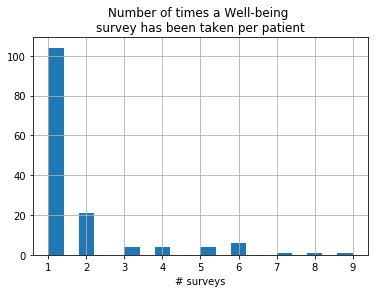

In [27]:
num_surveys_per_patient = life_quality[life_quality['Dimensiones']=='Entorno'].groupby('Identificacion').size().sort_values(ascending=False).reset_index(name='count')
display(num_surveys_per_patient.head())
print(sum(num_surveys_per_patient['count']))
num_surveys_per_patient.hist('count', bins=20)
plt.xlabel('# surveys')
plt.title('Number of times a Well-being \nsurvey has been taken per patient')

In [28]:
num_surveys_per_patient[num_surveys_per_patient['count']==1]['count'].size

104

In [29]:
b_lq_merge = pd.merge(basic_info, life_quality, left_on='ID', right_on='Identificacion', how='inner')
b_lq_merge

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,...,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO,Identificacion,FE_ALTA,Dimensiones,0_100
0,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00,502989,2017-01-03,Entorno,63.0
1,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00,502989,2017-01-03,Psicologico,69.0
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00,502989,2017-01-03,Relaciones interpersonales,50.0
3,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00,502989,2017-01-03,Salud fisica,63.0
4,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-09-10,Entorno,56.0
5,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-09-10,Psicologico,69.0
6,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-09-10,Relaciones interpersonales,44.0
7,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-09-10,Salud fisica,44.0
8,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-11-18,Entorno,100.0
9,524006,67.0,M,PRIMARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,...,A,PENSIONADO,CONTRIBUTIVO,COTIZANTE,PENSIONADO,1952-08-10 00:00:00,524006,2015-11-18,Psicologico,94.0


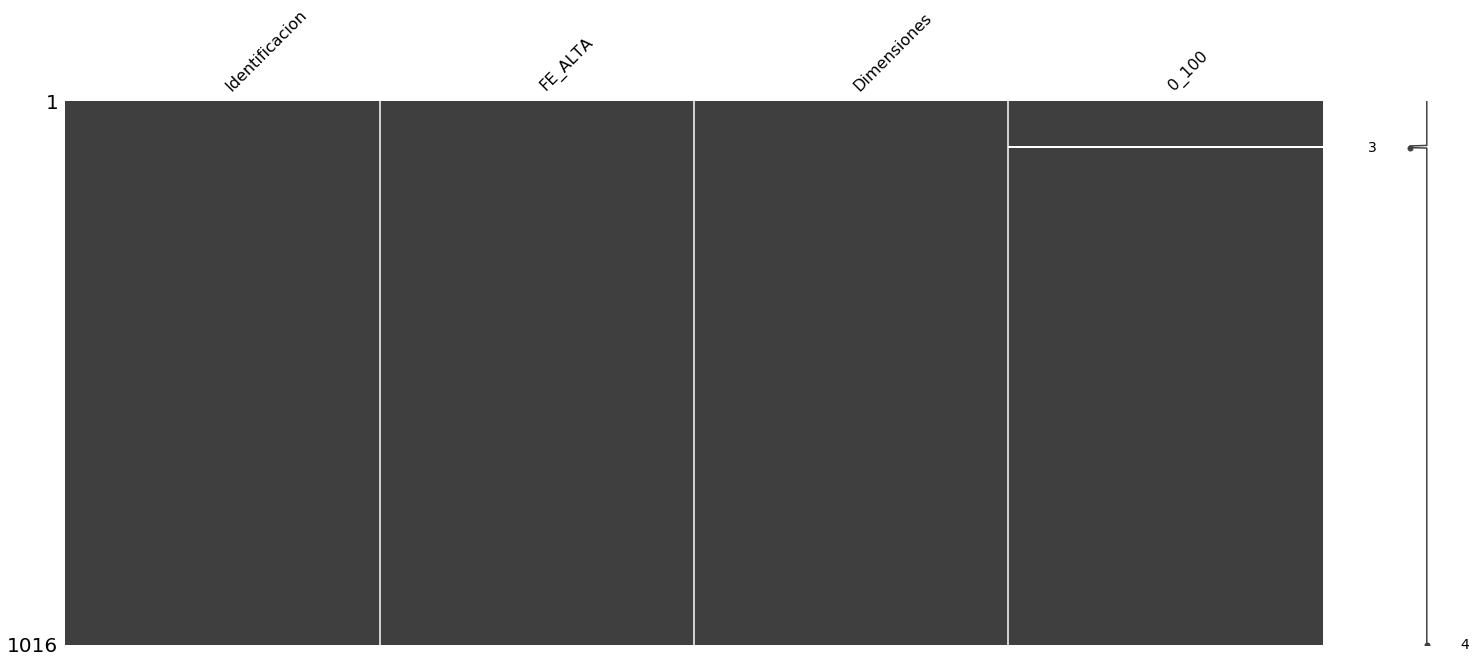

In [30]:
msno.matrix(life_quality)

### Familiar records

In [31]:
familiar_records.head(10)

,Id,EPS,FE_ALTA,FE_INICIO,FE_FIN,Diagnostico,CodDiagnostico,Parentesco
0,1998401,EPS/SURA,2012-07-09,2006-01-01,NaT,"ASMA, NO ESPECIFICADA",J459,MADRE
1,535255,EPS/SURA,2011-07-29,NaT,2011-07-29,"DIABETES MELLITUS, NO ESPECIFICADA SIN MENCION...",E149,ABUELO
2,1004538,EPS/SURA,2012-01-17,2009-06-10,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,PADRE
3,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,PADRE
4,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,MADRE
5,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,HERMANO(A)
6,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,DIABETES MELLITUS NO INSULINODEPENDIENTE CON C...,E111,MADRE
7,1664806,EPS/SURA,2012-07-09,2009-01-01,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,MADRE
8,1664806,EPS/SURA,2012-07-09,1950-01-01,NaT,"ASMA, NO ESPECIFICADA",J459,MADRE
9,1437443,EPS/SURA,2010-12-01,2010-12-01,2010-12-01,"ASMA, NO ESPECIFICADA",J459,MADRE


In [35]:
familiar_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
Id                104 non-null int64
EPS               104 non-null object
FE_ALTA           104 non-null datetime64[ns]
FE_INICIO         49 non-null datetime64[ns]
FE_FIN            27 non-null datetime64[ns]
Diagnostico       104 non-null object
CodDiagnostico    104 non-null object
Parentesco        104 non-null object
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 6.6+ KB


In [34]:
len(familiar_records['Id'].unique())

53

In [56]:
familiar_records['Id'] = familiar_records['Id'].astype('str')
familiar_records.describe(include='all')

,Id,EPS,FE_ALTA,FE_INICIO,FE_FIN,Diagnostico,CodDiagnostico,Parentesco
count,104,104,104,49,27,104,104,104
unique,53,2,50,34,13,32,32,6
top,674247,EPS/SURA,2011-09-13 00:00:00,2009-06-11 00:00:00,2011-09-13 00:00:00,HIPERTENSION ESENCIAL (PRIMARIA),I10X,MADRE
freq,7,99,6,4,6,30,30,35
first,NaN,NaN,2010-12-01 00:00:00,1950-01-01 00:00:00,2010-12-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2019-06-19 00:00:00,2019-03-15 00:00:00,2011-10-11 00:00:00,NaN,NaN,NaN


In [48]:
common_diagnosis = familiar_records[['Id', 'Diagnostico']].groupby('Diagnostico').size().sort_values().reset_index(name='count')
common_diagnosis.tail(10)

,Diagnostico,count
22,"DIABETES MELLITUS, NO ESPECIFICADA SIN MENCION...",2
23,"CARDIOMIOPATIA, NO ESPECIFICADA",2
24,"ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, NO ES...",3
25,ASMA NO ALERGICA,3
26,ASMA MIXTA,3
27,DIABETES INSIPIDA,3
28,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...,4
29,"INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI...",5
30,"ASMA, NO ESPECIFICADA",26
31,HIPERTENSION ESENCIAL (PRIMARIA),30


Text(0.5,1,'Number of cases')

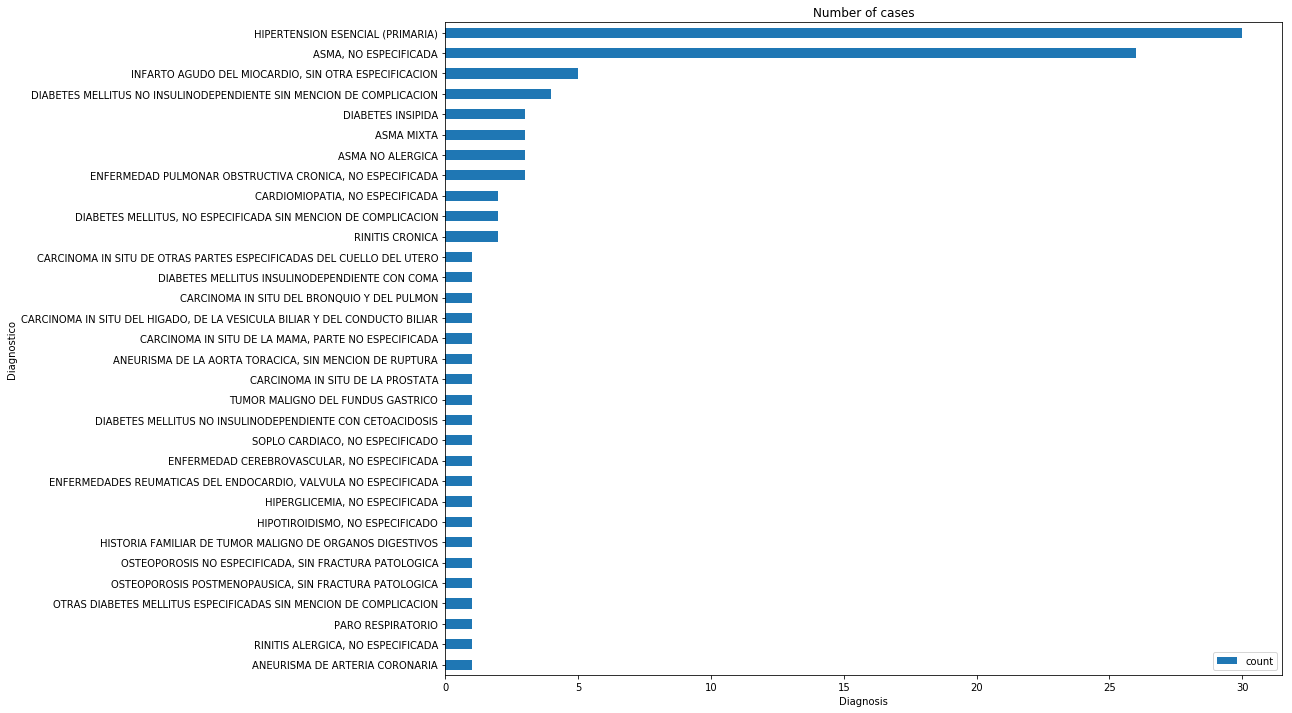

In [54]:
common_diagnosis.plot(kind='barh', x='Diagnostico', figsize=(15,12))
plt.xlabel('Diagnosis')
plt.title('Number of cases')

In [58]:
common_relative = familiar_records[['Id', 'Parentesco']].groupby('Parentesco').size().sort_values().reset_index(name='count')
common_relative.tail(10)

,Parentesco,count
0,ABUELO,4
1,FAMILIAR CERCANO,4
2,ABUELA,8
3,HERMANO(A),20
4,PADRE,33
5,MADRE,35


Text(0.5,1,'Number of cases')

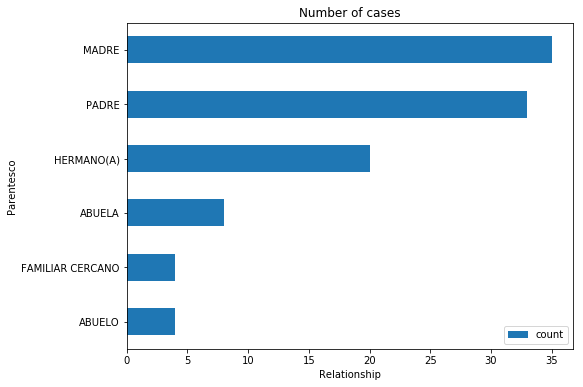

In [61]:
common_relative.plot(kind='barh', x='Parentesco', figsize=(8,6))
plt.xlabel('Relationship')
plt.title('Number of cases')

In [67]:
familiar_records[(~familiar_records['FE_INICIO'].isna()) & (familiar_records['FE_FIN'].isna())].shape

(42, 8)

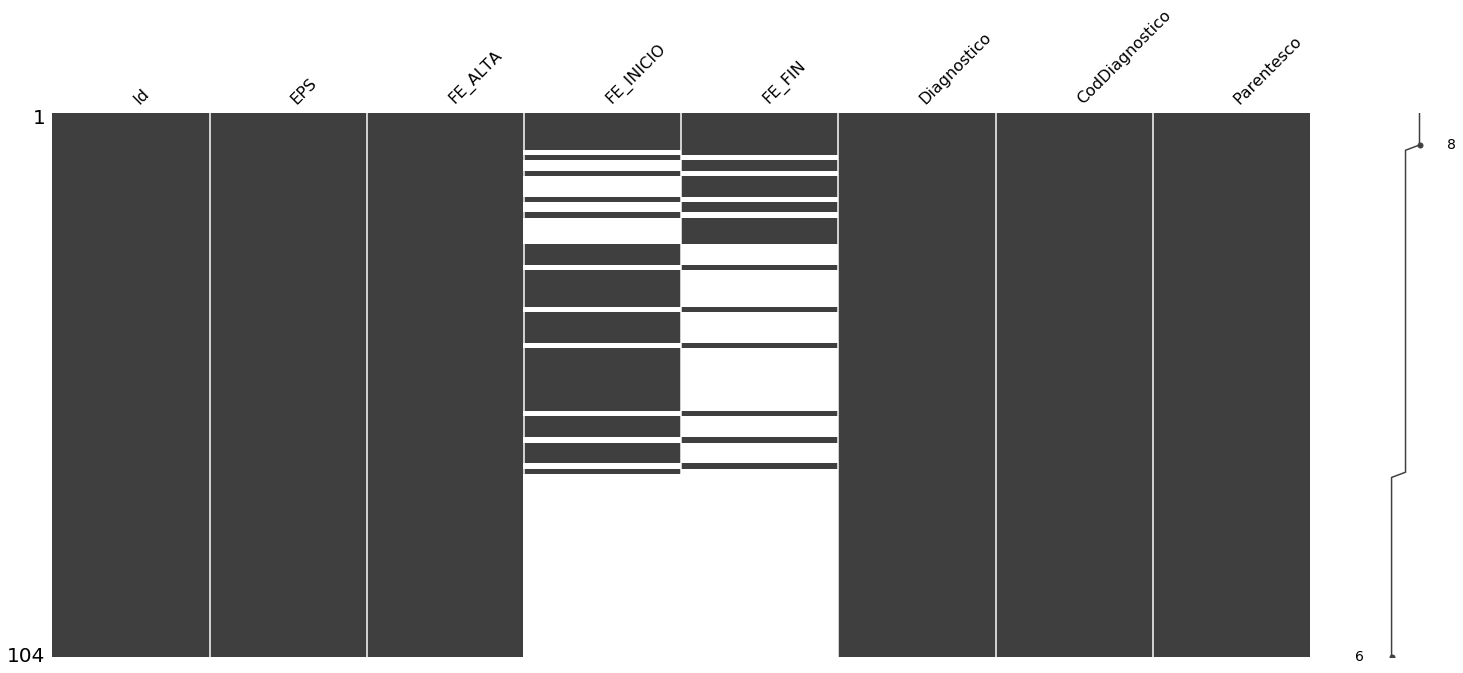

In [68]:
msno.matrix(msno.nullity_sort(familiar_records, sort='descending'))